# Variance Threshold Transformer

In [1]:
from sklearn.feature_selection import VarianceThreshold

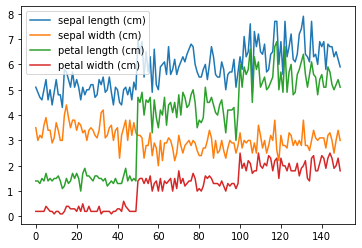

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [5]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [6]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [7]:
selector.get_support()

array([ True, False,  True,  True])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
import numpy as np

In [13]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# Select KBest

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [18]:
selector = SelectKBest(chi2, k=1)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True, False])

In [19]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

# Select from model

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [22]:
selector = SelectFromModel(SGDClassifier(random_state=0),
                          threshold='mean')
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

In [28]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

# RFE + RFECV

In [29]:
from sklearn.feature_selection import RFE, RFECV

In [32]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)

selector.fit(X,y)
selector.ranking_

array([2, 1, 1, 1])

In [33]:
selector.grid_scores_

array([0.8       , 0.84666667, 0.77333333])